## 課程目標
    
利用神經網路的加法減法數學式來說明梯度下降

## 範例重點
    
透過網路參數(b, w)的更新可以更容易理解梯度下降的求值過程

## 梯度 Gradient

在微積分裡面，對多元函數的參數求 ∂ 偏導數，把求得各個參數的偏導數以向量的形式寫出來，就是梯度。比如函數 f(x)，對 x 求偏導數，求得的梯度向量就是 ∂f/∂x，簡稱 grad f(x) 或者 ▽f(x)。

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 目標函數: y = (x + 3) ^ 2
def func(x): 
    return np.square(x + 3)

# 目標函數的一階導函數: dy/dx = 2 * (x + 3)
def dfunc(x):
    return 2 * (x + 3)

## 梯度下降法

給定起始點與目標函數的一階導函數(偏導數)，求在 epochs 次迭代中 x 的更新值。

Loss(w) 為目標函數，v 表示 w 要改變的幅度：v = learning_rate * (dL/dw)，w <-- w - v = w - learning_rate * (dL/dw)。

In [3]:
def gradient_descent_iterator(init_x=3, epochs=20, learning_rate=0.01):
    prev_x, iters = init_x, {}
    for i in range(epochs):
        next_x = prev_x - learning_rate * dfunc(prev_x)
        prev_x, iters[i] = next_x, prev_x
    return np.array(list(iters.items()))

def gradient_descent_plot(x, w, learning_rate):
    plt.figure('Gradient Descent', (8, 5,))
    plt.plot(x, func(x), c='b')
    plt.scatter(w, func(w), c='r', label='lr={}'.format(learning_rate))
    plt.legend()
    plt.show()

In [4]:
x = np.arange(-6.0, 6.0, 0.01)
iters = gradient_descent_iterator()
iters

array([[ 0.        ,  3.        ],
       [ 1.        ,  2.88      ],
       [ 2.        ,  2.7624    ],
       [ 3.        ,  2.647152  ],
       [ 4.        ,  2.53420896],
       [ 5.        ,  2.42352478],
       [ 6.        ,  2.31505429],
       [ 7.        ,  2.2087532 ],
       [ 8.        ,  2.10457814],
       [ 9.        ,  2.00248657],
       [10.        ,  1.90243684],
       [11.        ,  1.8043881 ],
       [12.        ,  1.70830034],
       [13.        ,  1.61413434],
       [14.        ,  1.52185165],
       [15.        ,  1.43141462],
       [16.        ,  1.34278632],
       [17.        ,  1.2559306 ],
       [18.        ,  1.17081199],
       [19.        ,  1.08739575]])

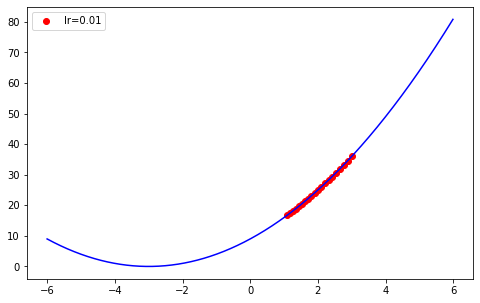

In [5]:
gradient_descent_plot(x, iters[:, 1], 0.01)

## 學習率對梯度下降法的影響

學習率較小時，收斂到正確結果的速度較慢。

學習率較大時，容易在搜索過程中發生震盪。

In [6]:
class GradientDescentResult:

    def __init__(self, color, learning_rate):
        self.color, self.learning_rate = color, learning_rate
        self.iters = gradient_descent_iterator(learning_rate=learning_rate)

def gradient_descent_iterator(init_x=3, epochs=20, learning_rate=0.01):
    prev_x, iters = init_x, {}
    for i in range(epochs):
        next_x = prev_x - learning_rate * dfunc(prev_x)
        prev_x, iters[i] = next_x, prev_x
    return np.array(list(iters.items()))

def gradient_descent_plots(x, results):
    fig = plt.figure('Gradient Descent: Learning Rate', (12, 4,))
    for i, result in enumerate(results):
        gradient_descent_plot(x, result.iters[:, 1], fig, i, result.color, result.learning_rate)
    plt.show()

def gradient_descent_plot(x, w, fig, i, c, learning_rate):
    ax = fig.add_subplot(1, 3, i + 1)
    ax.plot(x, func(x), c='b')
    ax.scatter(w, func(w), c=c, label='lr={}'.format(learning_rate))
    ax.legend()

In [7]:
x = np.linspace(-5, 5, 100)
results = [GradientDescentResult(color, learning_rate) for color, learning_rate in [['r', 0.1], ['g', 0.01], ['y', 0.001]]]
results

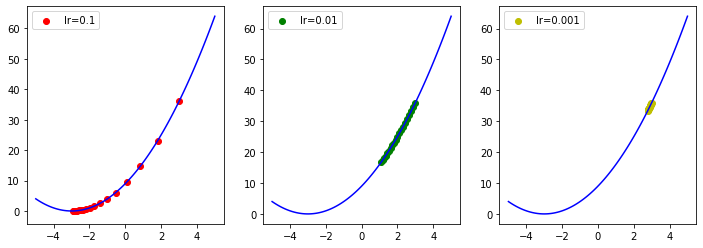

In [8]:
gradient_descent_plots(x, results)

## Result

學習率較大時，容易在搜索過程中發生震盪，而發生震盪的根本原因無非就是搜索的步長邁的太大了。

如果能夠讓學習率隨著迭代週期不斷衰減變小，那麼搜索時邁的步長就能不斷減少以減緩震盪，學習率衰減因子由此誕生。

## 學習率衰減公式

learning_rate <- learning_rate / (1 + decay * i)，decay 為一個介於 \[0, 1\] 的小數。

decay 越小，學習率衰減地越慢，當 decay = 0 時，學習率保持不變；

decay 越大，學習率衰減地越快，當 decay = 1 時，學習率衰減最快。

In [9]:
class GradientDescentResult:

    def __init__(self, decay):
        self.decay = decay
        self.iters = gradient_descent_iterator(decay=decay)

def gradient_descent_iterator(epochs=300, decay=0.0, learning_rate=1.4):
    return np.array([(i, learning_rate / (1.0 + decay * i),) for i in range(epochs)])

def gradient_descent_plots(results):
    plt.figure('Gradient Descent: Decay', (8, 5,))
    for result in results:
        gradient_descent_plot(result.iters[:, 0], result.iters[:, 1], result.decay)
    plt.ylim([0, 1.1])
    plt.legend(loc='best')
    plt.show()

def gradient_descent_plot(i, lr, decay):
    plt.plot(i, lr, label='dc={}'.format(decay))

In [10]:
results = [GradientDescentResult(decay) for decay in [0.0, 0.01, 0.4, 0.6, 0.8, 0.99]]
results

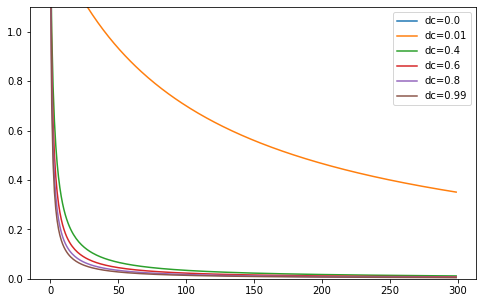

In [11]:
gradient_descent_plots(results)

## Result

衰減越大，學習率衰減地越快，衰減確實能夠對震盪起到減緩的作用。

## Momentum (動量)

如何用"動量"來解決:

1. 學習率較小時，收斂到極值的速度較慢。

2. 學習率較大時，容易在搜索過程中發生震盪。

當使用動量時，每次的 w 的更新量 v 為梯度下降量 -learning_rate * (dL/dw) 與上一次 v 乘上一個介於 \[0, 1\] 的因子 momentum 之和，即：

v <- momentum * v - learning_rate * (dL/dw)，w <- w + v

如果上一次的 momentum 與這一次的負梯度方向是相同的，那這次下降的幅度就會加大，這樣做能夠達到加速收斂的過程；

如果上一次的 momentum 與這一次的負梯度方向是相反的，那這次下降的幅度就會縮減，這樣做能夠達到減速收斂的過程。

In [12]:
class GradientDescentResult:

    def __init__(self, color, momentum, learning_rate):
        self.color, self.momentum, self.learning_rate = color, momentum, learning_rate
        self.iters = gradient_descent_iterator(momentum=momentum, learning_rate=learning_rate)

def gradient_descent_iterator(init_x=4, epochs=10, momentum=0.0, learning_rate=0.01):
    prev_x, curr_v, iters = init_x, 0.0, {}
    for i in range(epochs):
        curr_v = momentum * curr_v - learning_rate * dfunc(prev_x)
        next_x = prev_x + curr_v
        prev_x, iters[i] = next_x, prev_x
    return np.array(list(iters.items()))

def gradient_descent_plots(x, results):
    fig = plt.figure('Gradient Descent: Momentum', (16, 16,))
    for i, result in enumerate(results):
        gradient_descent_plot(x, result.iters[:, 1], fig, i, result.color, result.momentum, result.learning_rate)
    plt.show()

def gradient_descent_plot(x, w, fig, i, c, momentum, learning_rate):
    ax = fig.add_subplot(4, 4, i + 1)
    ax.plot(x, func(x), c='b')
    ax.scatter(w, func(w), c=c, label='lr={}, mo={}'.format(learning_rate, momentum))
    ax.set_xlim([-10, 5])
    ax.legend(loc=0)

In [13]:
x = np.linspace(-8, 5, 100)
results = []
for color, learning_rate in [['k', 0.01], ['r', 0.1], ['g', 0.6], ['y', 0.9]]:
    results.extend([GradientDescentResult(color, momentum, learning_rate) for momentum in [0.0, 0.1, 0.5, 0.9]])
results

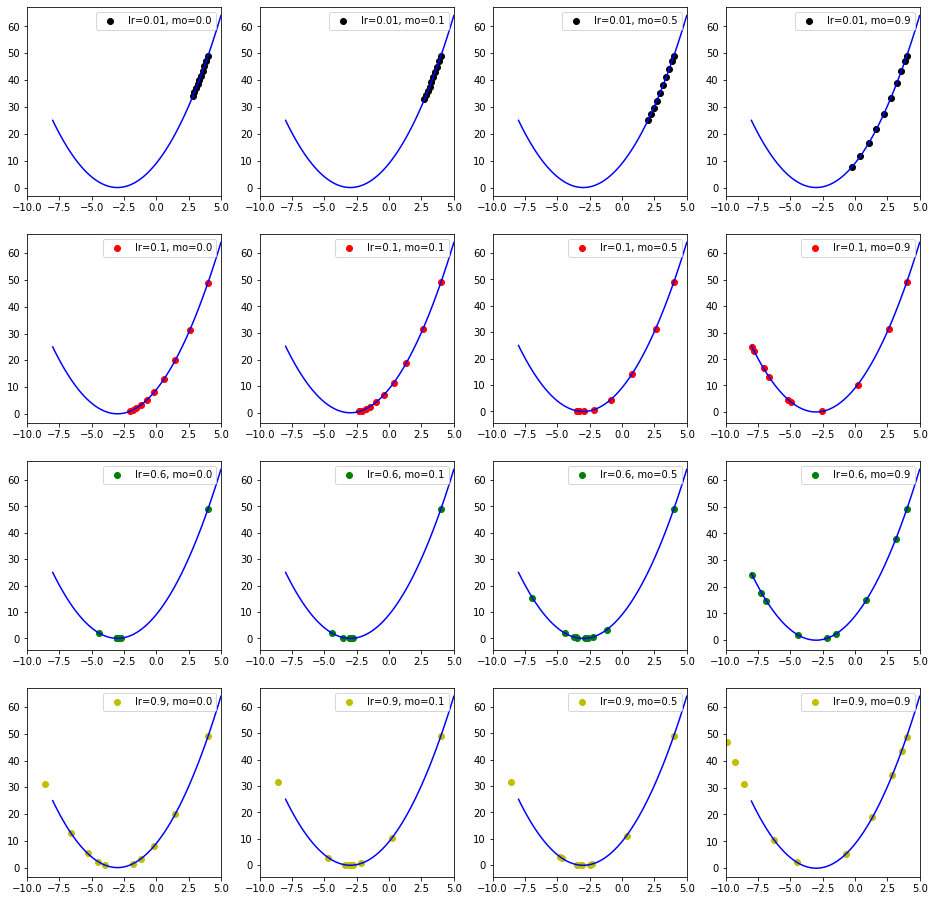

In [14]:
gradient_descent_plots(x, results)